In [49]:
image = "/Users/avkashchauhan/Downloads/goldfish1.jpg"

In [42]:
from deeputil.imageassist import ImageUtils

Now importing selected image from the disk with default size (256, 256) ...


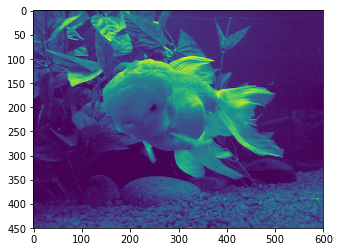

Now importing selected image from the disk...
Image as array shape: (224, 224, 3)
Now preprocessing the image to get ready for classification..


In [50]:
ImageUtils.display_image_from_disk(image)
img = ImageUtils.import_image_from_disk(image, (224,224), isGray= False)
img_array = ImageUtils.convert_image_array(img)
img_p = ImageUtils.preprocess_image_array(img_array)

In [4]:
import tensorflow
from deeputil.model import ModelsMaster
from deeputil.modelassist import KerasModelHelper

In [5]:
v16 = ModelsMaster.get_vgg16_model()

VGG16 model is about ~0.5GB, so make sure you have time and space to make it happen....


In [ ]:
KerasModelHelper.get_model_layers_details_all_extended(v16)

In [ ]:
from deeputil.modelassist import ImportExport

In [ ]:
model = ImportExport.import_keras_model_config_and_weight_and_compile('/Users/avkashchauhan/learn/deepwater/x.json', 
                                                                      '/Users/avkashchauhan/learn/deepwater/x.h5',
                                                                      show_info = True)

In [44]:
KerasModelHelper.get_model_layers_details_all_extended(v16, img_p, show_info=False)

,Id,LayerName,Type,Filters,InputShape,OutputShape,Activation,ParameterCount,Act_Shape,FeatureMapSize,FeatureMapCount
0,0,input_1,InputLayer,NaN,"(None, 224, 224, 3)","(None, 224, 224, 3)",None,0,"(1, 224, 224, 3)","(224, 3)",3
1,1,block1_conv1,Conv2D,64,"(None, 224, 224, 3)","(None, 224, 224, 64)",relu,1792,"(1, 224, 224, 64)","(224, 64)",64
2,2,block1_conv2,Conv2D,64,"(None, 224, 224, 64)","(None, 224, 224, 64)",relu,36928,"(1, 224, 224, 64)","(224, 64)",64
3,3,block1_pool,MaxPooling2D,NaN,"(None, 224, 224, 64)","(None, 112, 112, 64)",None,0,"(1, 112, 112, 64)","(112, 64)",64
4,4,block2_conv1,Conv2D,128,"(None, 112, 112, 64)","(None, 112, 112, 128)",relu,73856,"(1, 112, 112, 128)","(112, 128)",128
5,5,block2_conv2,Conv2D,128,"(None, 112, 112, 128)","(None, 112, 112, 128)",relu,147584,"(1, 112, 112, 128)","(112, 128)",128
6,6,block2_pool,MaxPooling2D,NaN,"(None, 112, 112, 128)","(None, 56, 56, 128)",None,0,"(1, 56, 56, 128)","(56, 128)",128
7,7,block3_conv1,Conv2D,256,"(None, 56, 56, 128)","(None, 56, 56, 256)",relu,295168,"(1, 56, 56, 256)","(56, 256)",256
8,8,block3_conv2,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080,"(1, 56, 56, 256)","(56, 256)",256
9,9,block3_conv3,Conv2D,256,"(None, 56, 56, 256)","(None, 56, 56, 256)",relu,590080,"(1, 56, 56, 256)","(56, 256)",256


In [ ]:
KerasModelHelper.get_model_layers_details_all(model, show_info=False)

In [ ]:
KerasModelHelper.get_model_input_image_shape_info(model, show_info=True)

In [ ]:
from deeputil.imageassist import ImageUtils

In [ ]:
img_path = "/Users/avkashchauhan/learn/deepwater/dog-bw.jpg"

In [ ]:
img = ImageUtils.import_image_from_disk(img_path, (224,224), isGray= False)
img_array = ImageUtils.convert_image_array(img)
img_p = ImageUtils.preprocess_image_array(img_array)

In [ ]:
KerasModelHelper.get_model_layers_details_all_extended(model, img_p, show_info=False)

In [35]:
KerasModelHelper.get_model_layer_details_by_layerId(v16, 22, show_info=False)

{'name': 'predictions', 'trainable': True, 'units': 1000, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
Layer Id : 22
Layer Name : predictions
Layer Type : Dense
Layer filters : NaN
Layer Number : 22
Layer Input Shape : (None, 4096)
Layer output shape :(None, 1000)
Num of Parameters :4097000


In [19]:
KerasModelHelper.get_feature_map_counts_for_all_layers(v16, img_p)

Now collecting feature maps for all layers in the given model..
Feature maps for all layers are collected.


,LayerId,FeatureMapCount
0,0,3
1,1,64
2,2,64
3,3,64
4,4,128
5,5,128
6,6,128
7,7,256
8,8,256
9,9,256


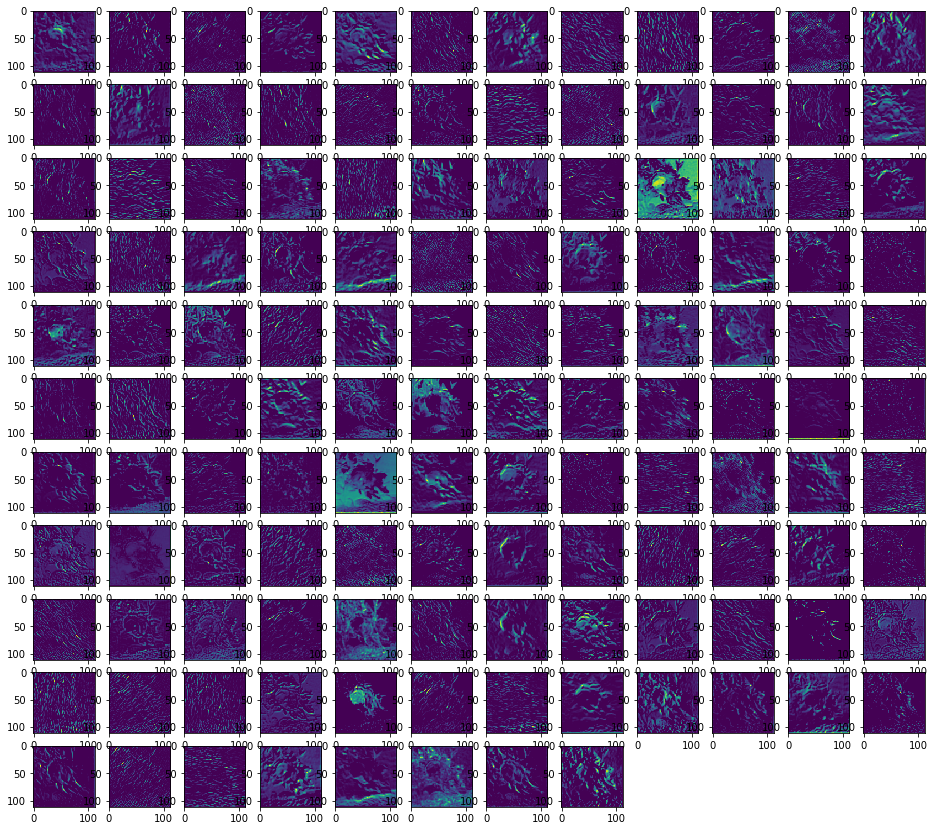

In [52]:
KerasModelHelper.display_full_feature_map_for_selected_layer_in_model(v16, 5, img_p, show_info=False)

Now collecting feature map for the selected layer in the given model..


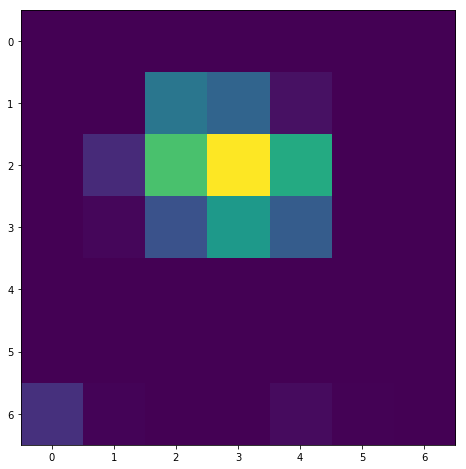

You are watching feature map #100 from the layer #18.


In [54]:
KerasModelHelper.display_individual_feature_for_selected_layer_in_model(v16,18, 100, img_p)